<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/Copy_of_D2S_data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip uninstall keras-nightly
!pip install h5py==2.10.0
!pip install q keras==2.1.6

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
     |████████████████████████████████| 339 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.1.6 which i

In [2]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.3 MB 32 kB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
     |████████████████████████████████| 488 kB 42.2 MB/s 
     |████████████████████████████████| 3.1 MB 34.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you

In [4]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [5]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import urllib.request
import shutil
import pandas as pd
import tensorflow as tf
import keras
from google.colab import drive
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [6]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [8]:
print(os.getcwd())

/content/gdrive/MyDrive/Colab Notebooks


In [9]:
#!git clone https://github.com/matterport/Mask_RCNN.git

In [10]:
ROOT_DIR = 'gdrive/My Drive/Colab Notebooks/Mask_RCNN'

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import MaskRCNN

In [11]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks")

In [12]:
## !git clone https://github.com/waleedka/coco.git

In [13]:
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version

import coco

# Download and install the Python COCO tools from https://github.com/waleedka/coco
# That's a fork from the original https://github.com/pdollar/coco with a bug
# fix for Python 3.
# I submitted a pull request https://github.com/cocodataset/cocoapi/pull/50
# If the PR is merged then use the original repo.
# Note: Edit PythonAPI/Makefile and replace "python" with "python3".
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils
from pycocotools import mask

In [15]:
annFile1='/content/gdrive/My Drive/Colab Notebooks/supermarket_data/d2s_annotations_v1/D2S_validation.json'
coco=COCO(annFile1)

class_ids = sorted(coco.getCatIds())
print("Classes:")
cat_names = []
for i in class_ids:
  print(i,'-', coco.loadCats(i)[0]["name"])
  cat_names.append(coco.loadCats(i)[0]["name"])

loading annotations into memory...
Done (t=1.60s)
creating index...
index created!
Classes:
1 - adelholzener_alpenquelle_classic_075
2 - adelholzener_alpenquelle_naturell_075
3 - adelholzener_classic_bio_apfelschorle_02
4 - adelholzener_classic_naturell_02
5 - adelholzener_gourmet_mineralwasser_02
6 - augustiner_lagerbraeu_hell_05
7 - augustiner_weissbier_05
8 - coca_cola_05
9 - coca_cola_light_05
10 - suntory_gokuri_limonade
11 - tegernseer_hell_03
12 - corny_nussvoll
13 - corny_nussvoll_single
14 - corny_schoko_banane
15 - corny_schoko_banane_single
16 - dr_oetker_vitalis_knuspermuesli_klassisch
17 - koelln_muesli_fruechte
18 - koelln_muesli_schoko
19 - caona_kakaohaltiges_getraenkepulver
20 - cocoba_fruehstueckskakao_mit_honig
21 - cafe_wunderbar_espresso
22 - douwe_egberts_professional_kaffee_gemahlen
23 - gepa_bio_caffe_crema
24 - gepa_italienischer_bio_espresso
25 - apple_braeburn_bundle
26 - apple_golden_delicious
27 - apple_granny_smith
28 - apple_roter_boskoop
29 - avocado
30 

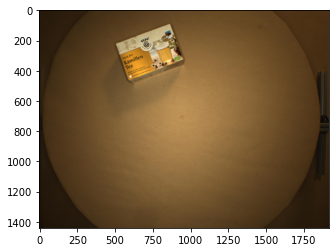

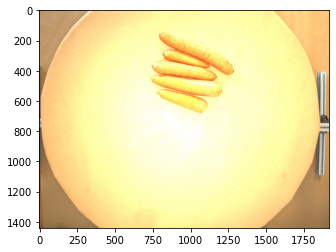

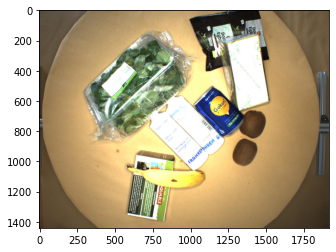

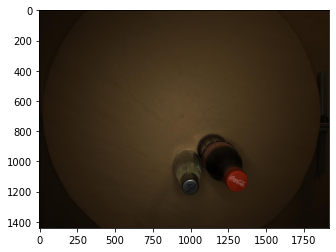

In [ ]:
from glob import glob

images = sorted(glob("/content/gdrive/My Drive/Colab Notebooks/supermarket_data/images/*"))

## showing some car images and their classes
from PIL import Image

for i in range(1,12005,4000):
    image = Image.open(images[i])
    imgplot = plt.imshow(image)
    plt.show()

In [16]:
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = '/content/gdrive/MyDrive/Colab Notebooks/Mask_RCNN/mask_rcnn_coco.h5'

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    print("COCO Model not found!")
    utils.download_trained_weights(COCO_MODEL_PATH)

In [17]:
# Directory of images to run detection on
D2S_DATSET_DIR = '/content/gdrive/My Drive/Colab Notebooks/supermarket_data'

**Loading the data**

In [18]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import zipfile
import urllib.request
import shutil
import pandas as pd
import tensorflow as tf

from mrcnn.config import Config
from mrcnn import model as modellib, utils
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import MaskRCNN
from sklearn.model_selection import train_test_split
from pycocotools import mask as maskUtils
from pycocotools.coco import COCO

#============================= Root directory of the project
sys.path.append(os.path.join(ROOT_DIR, "mrcnn/")) 

# =================Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")




In [20]:
class d2sCOCO(COCO):
      def loadRes(self, resFile):
        """
        Load result file and return a result api object.
        :param   resFile (str)     : file name of result file
        :return: res (obj)         : result api object
        """
        res = COCO()
        res.dataset['images'] = [img for img in self.dataset['images']]

        print('Loading and preparing results...')
        tic = time.time()
        # Check result type in a way compatible with Python 2 and 3.
        try:
            is_string =  isinstance(resFile, basestring)  # Python 2
        except NameError:
            is_string = isinstance(resFile, str)  # Python 3
        if is_string:
            anns = json.load(open(resFile))
        elif type(resFile) == np.ndarray:
            anns = self.loadNumpyAnnotations(resFile)
        else:
            anns = resFile
        assert type(anns) == list, 'results in not an array of objects'
        annsImgIds = [ann['image_id'] for ann in anns]
        assert set(annsImgIds) == (set(annsImgIds) & set(self.getImgIds())), \
               'Results do not correspond to current coco set'
        if 'caption' in anns[0]:
            imgIds = set([img['id'] for img in res.dataset['images']]) & set([ann['image_id'] for ann in anns])
            res.dataset['images'] = [img for img in res.dataset['images'] if img['id'] in imgIds]
            for id, ann in enumerate(anns):
                ann['id'] = id+1
        elif 'bbox' in anns[0] and not anns[0]['bbox'] == []:
            res.dataset['categories'] = copy.deepcopy(self.dataset['categories'])
            for id, ann in enumerate(anns):
                bb = ann['bbox']
                x1, x2, y1, y2 = [bb[0], bb[0]+bb[2], bb[1], bb[1]+bb[3]]
                if not 'segmentation' in ann:
                    ann['segmentation'] = [[x1, y1, x1, y2, x2, y2, x2, y1]]
                ann['area'] = bb[2]*bb[3]
                ann['id'] = id+1
                ann['iscrowd'] = 0
        elif 'segmentation' in anns[0]:
            res.dataset['categories'] = copy.deepcopy(self.dataset['categories'])
            for id, ann in enumerate(anns):
                # now only support compressed RLE format as segmentation results
                ann['area'] = maskUtils.area(ann['segmentation'])
                if not 'bbox' in ann:
                    ann['bbox'] = maskUtils.toBbox(ann['segmentation'])
                ann['id'] = id+1
                ann['iscrowd'] = 0
        elif 'keypoints' in anns[0]:
            res.dataset['categories'] = copy.deepcopy(self.dataset['categories'])
            for id, ann in enumerate(anns):
                s = ann['keypoints']
                x = s[0::3]
                y = s[1::3]
                x0,x1,y0,y1 = np.min(x), np.max(x), np.min(y), np.max(y)
                ann['area'] = (x1-x0)*(y1-y0)
                ann['id'] = id + 1
                ann['bbox'] = [x0,y0,x1-x0,y1-y0]
        print('DONE (t={:0.2f}s)'.format(time.time()- tic))

        res.dataset['annotations'] = anns
        res.createIndex()
        return res

In [33]:
annFile1= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')
coco=d2sCOCO(annFile1)

cats = coco.loadCats(coco.getCatIds())
catIds=[cat['id'] for cat in cats]

imgids=[]
for i, value in enumerate(catIds):
    imgid=coco.getImgIds(catIds=catIds[i])
    imgids.extend(imgid)

imgids = list(set(imgids))

imgDict = coco.loadImgs(imgids)
img1 = pd.DataFrame.from_dict(imgDict)
data_list1=img1.filter(['file_name','id'])

X_train,X_val1 = train_test_split(data_list1,test_size=0.2, random_state=42,
                                 shuffle=True)
X_val,X_test = train_test_split(X_val1,test_size=0.5, random_state=42,
                                 shuffle=True)
img_id_train=X_train['id']
img_id_dev=X_val['id']
img_id_test = X_test['id']
X_train=X_train['file_name']
X_val=X_val['file_name']
X_test = X_test['file_name']
X_train.reset_index(drop=True,inplace=True)
X_val.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [34]:
#=================================define functions ================================
class FruitDataset(utils.Dataset):
    def load_fruit(self,subset):
        
        #annotation path
        annFile= annFile1
        coco=COCO(annFile)  
        
        dataset_dir= D2S_DATSET_DIR
        assert subset in ["train", "val"]
            
        image_dir = os.path.join(D2S_DATSET_DIR, 'images')
        
        #=====need to run the coco_preprocess.py code
        if subset == "train" : 
            image_ids=img_id_train
        else:
            image_ids=img_id_dev
            
        # Add classes
        class_ids = sorted(coco.getCatIds())
        for i in class_ids:
            self.add_class("coco", i, coco.loadCats(i)[0]["name"])

        # Add images
        for i in image_ids:
            self.add_image(
                "coco", image_id=i,
                path=os.path.join(image_dir, coco.imgs[i]['file_name']),
                width=coco.imgs[i]["width"],
                height=coco.imgs[i]["height"],
                annotations=coco.loadAnns(coco.getAnnIds(imgIds=[i], iscrowd=False)))
        

    def load_mask(self, image_id):
        """Load instance masks for the given image.
        Different datasets use different ways to store masks. This
        function converts the different mask format to one format
        in the form of a bitmap [height, width, instances].
        Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a COCO image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "coco":
            return super(self.__class__).load_mask(image_id)

        instance_masks = []
        class_ids = []
        annotations = self.image_info[image_id]["annotations"]
        # Build mask of shape [height, width, instance_count] and list
        # of class IDs that correspond to each channel of the mask.
        for annotation in annotations:
            class_id = self.map_source_class_id(
                "coco.{}".format(annotation['category_id']))
            if class_id:
                m = self.annToMask(annotation, image_info["height"],
                                   image_info["width"])
                # Some objects are so small that they're less than 1 pixel area
                # and end up rounded out. Skip those objects.
                if m.max() < 1:
                    continue
                instance_masks.append(m)
                class_ids.append(class_id)

        # Pack instance masks into an array
        if class_ids:
            mask = np.stack(instance_masks, axis=2)
            class_ids = np.array(class_ids, dtype=np.int32)
            return mask, class_ids
        else:
            # Call super class to return an empty mask
            return super(self.__class__).load_mask(image_id)

    def image_reference(self, image_id):
        """Return a link to the image in the COCO Website."""
        info = self.image_info[image_id]
        if info["source"] == "coco":
            return "http://cocodataset.org/#explore?id={}".format(info["id"])
        else:
            super(self.__class__).image_reference(self, image_id)

    # The following two functions are from pycocotools with a few changes.

    def annToRLE(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE to RLE.
        :return: binary mask (numpy 2D array)
        """
        segm = ann['segmentation']
        if isinstance(segm, list):
            # polygon -- a single object might consist of multiple parts
            # we merge all parts into one mask rle code
            rles = maskUtils.frPyObjects(segm, height, width)
            rle = maskUtils.merge(rles)
        elif isinstance(segm['counts'], list):
            # uncompressed RLE
            rle = maskUtils.frPyObjects(segm, height, width)
        else:
            # rle
            rle = ann['segmentation']
        return rle

    def annToMask(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
        :return: binary mask (numpy 2D array)
        """
        rle = self.annToRLE(ann, height, width)
        m = maskUtils.decode(rle)
        return m

In [35]:
dataset_train = FruitDataset()
dataset_train.load_fruit(subset="train")
dataset_train.prepare()

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [36]:
def build_coco_results(dataset, image_ids, rois, class_ids, scores, masks):
    """Arrange resutls to match COCO specs in http://cocodataset.org/#format
    """
    # If no results, return an empty list
    if rois is None:
        return []

    results = []
    for image_id in image_ids:
        # Loop through detections
        for i in range(rois.shape[0]):
            class_id = class_ids[i]
            score = scores[i]
            bbox = np.around(rois[i], 1)
            mask = masks[:, :, i]

            result = {
                "image_id": image_id,
                "category_id": dataset.get_source_class_id(class_id, "coco"),
                "bbox": [bbox[1], bbox[0], bbox[3]-bbox[1], bbox[2]-bbox[0]],
                "score": score,
                "segmentation": maskUtils.encode(np.asfortranarray(mask))
            }
            results.append(result)
    return results

In [40]:
#=================================TRAINING SETP========================================
dataset_train = FruitDataset()
dataset_train.load_fruit(subset="train")
dataset_train.prepare()

dataset_val = FruitDataset()
dataset_val.load_fruit(subset="val")
dataset_val.prepare()


class FruitConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "fruit"
    
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    LEARNING_RATE =0.002
    
    #these 2 needs to set to training set / batch size
    STEPS_PER_EPOCH= 20
    
    #VALIDATION_STEPS=114//2
    GPU_COUNT =  1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 60  # Background + fruit
        
    #all following config to fit into 16G GPU
    BACKBONE = "resnet50"
    IMAGE_MIN_DIM = 128
    IMAGE_MAX_DIM = 128

    #VALIDATION_STEPS = 5

class InferenceConfig(FruitConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [41]:
config = FruitConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                73
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

In [42]:
COCO_MODEL_PATH = '/content/gdrive/MyDrive/Colab Notebooks/Mask_RCNN/mask_rcnn_coco.h5'

In [43]:
config = FruitConfig()
config.display()

model = modellib.MaskRCNN(mode="training", config=config,model_dir=MODEL_DIR)

model.load_weights(COCO_MODEL_PATH, by_name=True,exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=1,
                layers='all')


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  128
IMAGE_META_SIZE                73
IMAGE_MIN_DIM                  128
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [128 128   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2087: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may du



Epoch 1/1
19/20 [===========================>..] - ETA: 28s - loss: 4.4014 - rpn_class_loss: 0.2960 - rpn_bbox_loss: 0.8330 - mrcnn_class_loss: 1.5093 - mrcnn_bbox_loss: 0.9678 - mrcnn_mask_loss: 0.7953

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2348: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


20/20 [==============================] - 826s 41s/step - loss: 4.3875 - rpn_class_loss: 0.2935 - rpn_bbox_loss: 0.8196 - mrcnn_class_loss: 1.5147 - mrcnn_bbox_loss: 0.9690 - mrcnn_mask_loss: 0.7907 - val_loss: 3.1729 - val_rpn_class_loss: 0.2039 - val_rpn_bbox_loss: 0.7342 - val_mrcnn_class_loss: 0.7590 - val_mrcnn_bbox_loss: 0.7431 - val_mrcnn_mask_loss: 0.7327


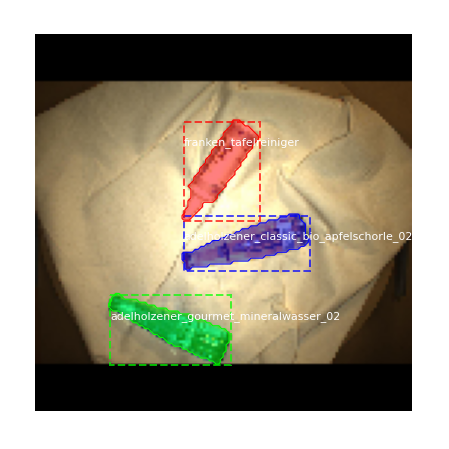

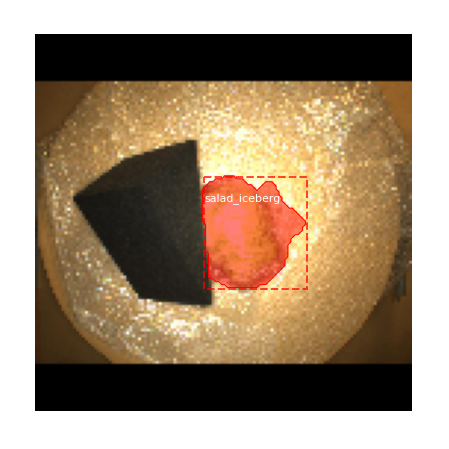

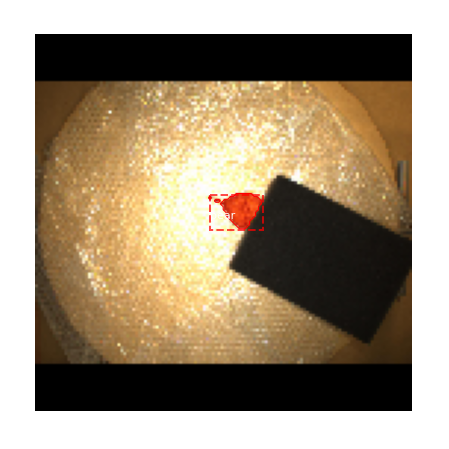

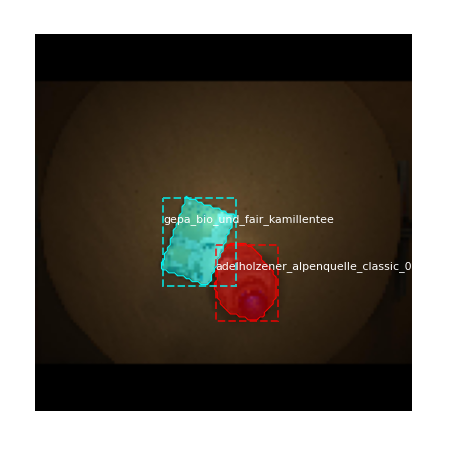

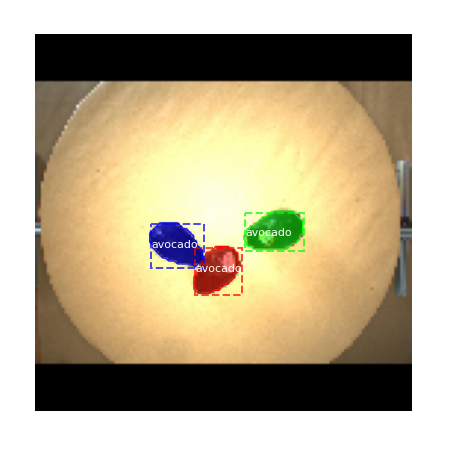

In [51]:
for i in range(5,50,11):
  original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset_val, inference_config, 
                            image_id=i, use_mini_mask=False)
    
  visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                              dataset_train.class_names, figsize=(8, 8))